In [110]:
import os
import re
import pandas as pd
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from matplotlib import pyplot

In [111]:
DATA = "data"
POS = "pos"
NEG = "neg"
ACL_IMDB = "aclImdb"
TRAIN = "train"
TEST = "test"

In [42]:
from nltk.corpus import stopwords

In [99]:
dataset_parts = (TRAIN, TEST)
text_sentiments = (POS, NEG)

filename_parser = re.compile(r"(?P<id>\d+)_(?P<rating>\d{,2}).txt")

train_data_list = []
test_data_list = []

for part in dataset_parts:
    for sentiment in text_sentiments:
        for filename in os.listdir(os.path.join(DATA, ACL_IMDB, part, sentiment)):
            with open(os.path.join(DATA, ACL_IMDB, part, sentiment, filename), "r", encoding="utf-8") as file:
                if part == TRAIN:
                    needed_list = train_data_list
                else:
                    needed_list = test_data_list
                needed_list.append({"text": file.read().strip(),
                                    "sentiment": int(sentiment == POS),
                                    "rating": int(filename_parser.match(filename).group("rating"))})

In [100]:
data_train = pd.DataFrame(train_data_list)
data_test = pd.DataFrame(test_data_list)

In [55]:
stopwords_en = stopwords.words("english")

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [117]:
vectorizer = TfidfVectorizer(use_idf=True, min_df=10, max_df=1000, stop_words=stopwords_en)
def evaluate_model(model_class,param_grid):
    grid = GridSearchCV(model_class(), param_grid=param_grid)
    pipeline = Pipeline([("vectorizer", vectorizer),
                         ("grid", grid)])
    pipeline.fit(data_train.text, data_train.sentiment)
    predictions = pipeline.predict(data_test.text)
    current_test_df = pd.DataFrame(data_test)
    current_test_df["predicted"] = predictions
    print(classification_report(data_test.sentiment, predictions))
    lr_auc = roc_auc_score(data_test.sentiment, predictions)
    lr_fpr, lr_tpr, _ = roc_curve(data_test.sentiment, predictions)
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

# Logistic Regression

/Users/grigoriyarshinov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



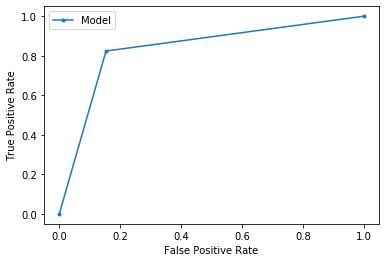

In [118]:
evaluate_model(LogisticRegression, dict(tol=[0.000005], solver=["lbfgs"]))

# SGD Classifier

/Users/grigoriyarshinov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.83      0.84      0.83     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



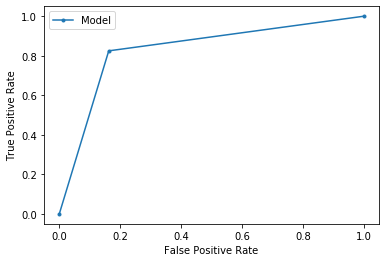

In [119]:
evaluate_model(SGDClassifier, {"loss": ["hinge", "modified_huber"], "penalty": ["l2", "elasticnet"]})

# Naive Bayes

/Users/grigoriyarshinov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.78      0.85      0.82     12500
           1       0.84      0.76      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



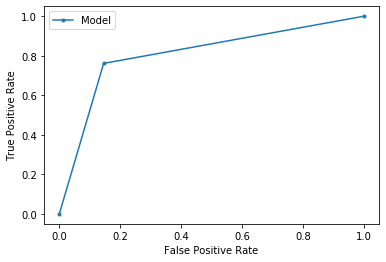

In [120]:
evaluate_model(MultinomialNB, {"alpha": [0.0001, 0.001, 0.01, 1.0]})

In [ ]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()